In [3]:
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv(r"C:\Users\Victor\.spyder-py3\Match_history.csv")
df_copy = df

#le = preprocessing.LabelEncoder()
#df_copy['WIN/LOSS?']=le.fit_transform(df_copy['WIN/LOSS?'])

# WIN = 0
# LOSS = 0


win = df_copy[df['WIN/LOSS?'] == 'WIN']
loss = df_copy[df['WIN/LOSS?'] == 'LOSS']
df

,Unnamed: 0,matchID,total kills,total deaths,total assists,Damage Dealt,Damage Taken,Time CC'ed,Total Gold Earned,First Blood Turret,#Assassins,#Fighters,#Mages,#Marksman,#Supports,#Tanks,WIN/LOSS?
0,0,3633340047W,43,60,97,388195,187097,234,70087,0,2,0,3,1,0,3,WIN
1,1,3633340047L,58,43,170,424275,146323,179,71260,1,0,2,4,1,3,0,LOSS
2,2,3633340047W,39,42,93,327363,149827,156,65735,1,1,2,2,1,2,2,WIN
3,3,3633340047L,42,39,98,338459,133510,192,62729,0,2,1,4,0,2,0,LOSS
4,4,3633340047W,43,33,92,273766,91827,97,57130,1,0,2,3,1,0,1,WIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,185,3633817223L,55,46,140,463448,138660,139,71890,0,1,1,2,2,2,0,LOSS
2064,186,3633817223W,69,72,135,552494,171331,145,89368,0,1,0,2,4,1,0,WIN
2065,187,3633817223L,72,69,138,566353,244314,156,90331,1,0,3,2,2,1,2,LOSS
2066,188,3633817223W,63,62,139,482339,178200,150,79914,0,1,1,2,2,0,1,WIN


In [52]:
a = df.groupby(['WIN/LOSS?']).sum()
tags = a[['#Assassins', '#Fighters', '#Mages', '#Marksman', '#Supports', '#Tanks']].copy()
tags
loss = tags.iloc[[0]]
win = tags.iloc[[1]]
tags

,#Assassins,#Fighters,#Mages,#Marksman,#Supports,#Tanks
WIN/LOSS?,,,,,,
LOSS,1305,1760,2200,1333,1169,1092
WIN,1165,1710,2263,1330,1179,1196


Text(0.5, 1.0, 'Distribution Losing Champion Classes')

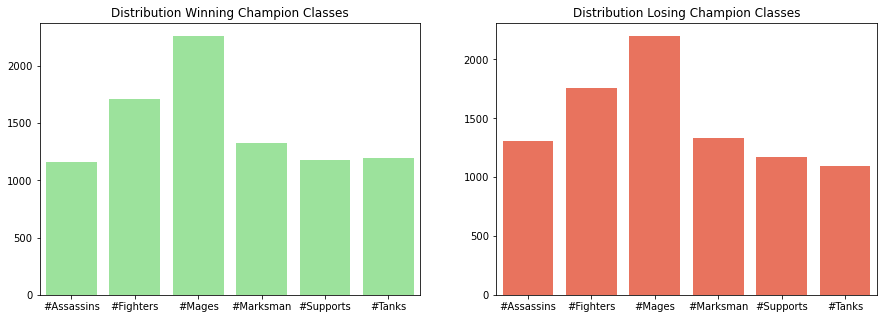

In [139]:
sns.color_palette("pastel")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(ax=axes[0], data=win, color="lightgreen")
axes[0].set_title('Distribution Winning Champion Classes')
sns.barplot(ax=axes[1], data=loss, color='tomato')
axes[1].set_title('Distribution Losing Champion Classes')

In [83]:
win_col = df_copy[df['WIN/LOSS?'] == 'WIN']
loss_col = df_copy[df['WIN/LOSS?'] == 'LOSS']
win_col

,Unnamed: 0,matchID,total kills,total deaths,total assists,Damage Dealt,Damage Taken,Time CC'ed,Total Gold Earned,First Blood Turret,#Assassins,#Fighters,#Mages,#Marksman,#Supports,#Tanks,WIN/LOSS?
0,0,3633340047W,43,60,97,388195,187097,234,70087,0,2,0,3,1,0,3,WIN
2,2,3633340047W,39,42,93,327363,149827,156,65735,1,1,2,2,1,2,2,WIN
4,4,3633340047W,43,33,92,273766,91827,97,57130,1,0,2,3,1,0,1,WIN
6,6,3633340047W,41,42,91,226358,102199,51,55065,0,2,3,2,1,0,0,WIN
8,8,3633340047W,41,25,111,182584,68565,74,46395,1,1,3,0,1,0,2,WIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,180,3633817223W,37,27,103,230384,87505,84,54263,0,0,0,2,3,2,1,WIN
2060,182,3633817223W,56,33,94,285452,85024,116,61626,0,2,1,4,1,0,1,WIN
2062,184,3633817223W,46,55,109,392247,184677,183,72601,1,2,1,2,1,2,1,WIN
2064,186,3633817223W,69,72,135,552494,171331,145,89368,0,1,0,2,4,1,0,WIN


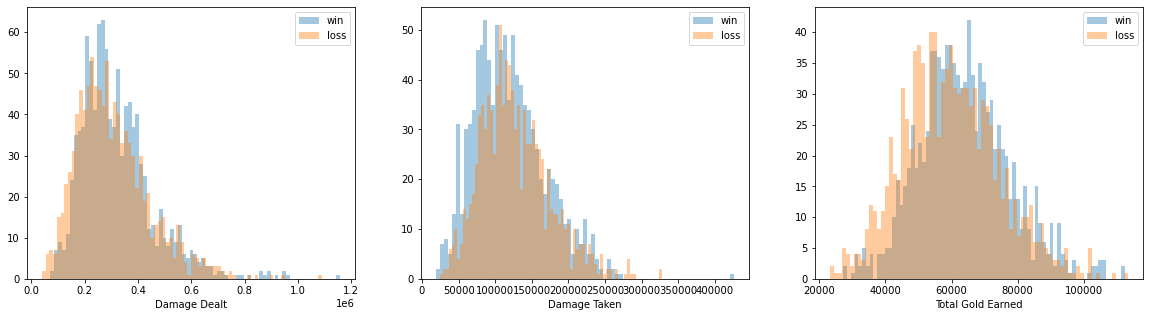

In [136]:
dd_w = win_col['Damage Dealt']
dd_L = loss_col['Damage Dealt']
dT_w = win_col['Damage Taken']
dT_L = loss_col['Damage Taken']
gold_w = win_col['Total Gold Earned']
gold_L = loss_col['Total Gold Earned']
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=False)
sns.distplot(dd_w, kde = False, bins = 75, ax=axes[0])
sns.distplot(dd_L, kde = False, bins = 75, ax=axes[0])
sns.distplot(dT_w, kde = False, bins = 75, ax=axes[1])
sns.distplot(dT_L, kde = False, bins = 75, ax=axes[1])
sns.distplot(gold_w, kde = False, bins = 75, ax=axes[2])
sns.distplot(gold_L, kde = False, bins = 75, ax=axes[2])
axes[0].legend(labels=['win', 'loss'])
axes[1].legend(labels=['win', 'loss'])
axes[2].legend(labels=['win', 'loss'])

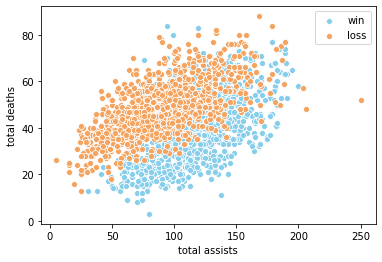

In [138]:
sns.scatterplot(data=win_col, x='total assists', y='total deaths', color='skyblue', legend = 'full')
sns.scatterplot(data=loss_col, x='total assists', y='total deaths', color='sandybrown', legend = 'full')
plt.legend(labels=['win', 'loss'])